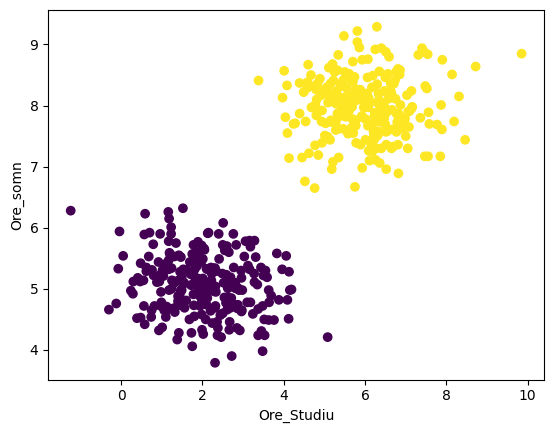

Promovare
1    250
0    250
Name: count, dtype: int64


In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pymc as pm

df = pd.read_csv("date_promovare_examen.csv")

plt.scatter(df['Ore_Studiu'], df['Ore_Somn'], c=df['Promovare'])
plt.xlabel('Ore_Studiu')
plt.ylabel('Ore_somn')
plt.show()

print(df['Promovare'].value_counts())

In [38]:
x1 = df['Ore_Studiu'].values
x2 = df['Ore_Somn'].values
y = df['Promovare'].values

with pm.Model() as logistic_model:
    w0 = pm.Normal('w0', mu=0, sigma=10)
    w1 = pm.Normal('w1', mu=0, sigma=10)
    w2 = pm.Normal('w2', mu=0, sigma=10)
    
    wx = w0 + w1 * x1 + w2 * x2
    
    p = pm.Deterministic('p', pm.math.sigmoid(wx))
    y_obs = pm.Bernoulli('y_obs', p=p, observed=y)
    
    trace = pm.sample(2000, return_inferencedata=True)

pm.summary(trace)


Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [w0, w1, w2]


Output()

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 35 seconds.
There were 1901 divergences after tuning. Increase `target_accept` or reparameterize.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
w0,-29.095,4.969,-38.327,-20.393,0.203,0.144,531.0,273.0,1.02
w1,2.347,0.899,0.686,4.012,0.027,0.019,1127.0,1432.0,1.00
w2,3.094,0.831,1.562,4.627,0.033,0.023,473.0,327.0,1.02
p[0],1.000,0.000,1.000,1.000,0.000,0.000,896.0,768.0,1.01
p[1],1.000,0.000,1.000,1.000,0.000,0.000,687.0,657.0,1.01
...,...,...,...,...,...,...,...,...,...
p[495],0.001,0.001,0.000,0.003,0.000,0.000,801.0,773.0,1.01
p[496],0.002,0.005,0.000,0.008,0.000,0.000,1123.0,1610.0,1.00
p[497],0.001,0.001,0.000,0.003,0.000,0.000,1020.0,1060.0,1.00
p[498],0.000,0.000,0.000,0.000,0.000,0.000,899.0,835.0,1.01


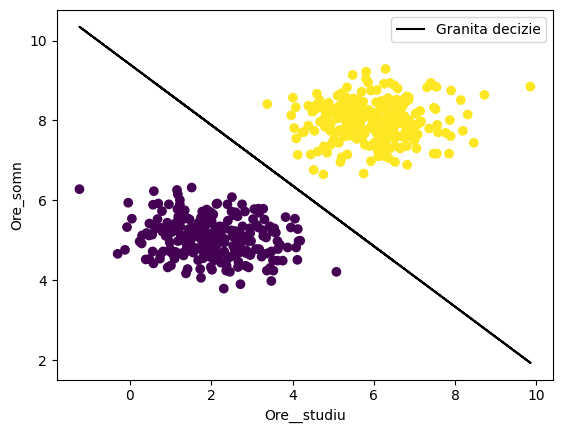

In [39]:
w0_mean = trace.posterior['w0'].mean().values
w1_mean = trace.posterior['w1'].mean().values
w2_mean = trace.posterior['w2'].mean().values

linie = -(w0_mean + w1_mean * x1) / w2_mean

plt.scatter(df['Ore_Studiu'], df['Ore_Somn'], c=df['Promovare'])
plt.plot(x1, linie, color='black', label='Granita decizie')
plt.xlabel('Ore__studiu')
plt.ylabel('Ore_somn')
plt.legend()
plt.show()

In [40]:
print(w1_mean)
print(w2_mean)

2.3468938825962673
3.0935248365976733
